In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import json
import numpy as np
from math import isclose

sns.set(font_scale=1.5)

In [2]:
df = pd.concat([
    pd.read_csv('logs-sip/log-SAT-run.txt'),
    pd.read_csv('logs-sip/log-SRV-run.txt'),
    pd.read_csv('logs-sip/log-SH-run.txt')
    ],ignore_index=True)
df['standalone.engine[ms]']=df['standalone.total[ms]']-(df['standalone.sync[ms]']+df["standalone.prop[ms]"])
df['incremental.engine[ms]']=df['incremental.total[ms]']-(df['incremental.sync[ms]']+df["incremental.prop[ms]"])

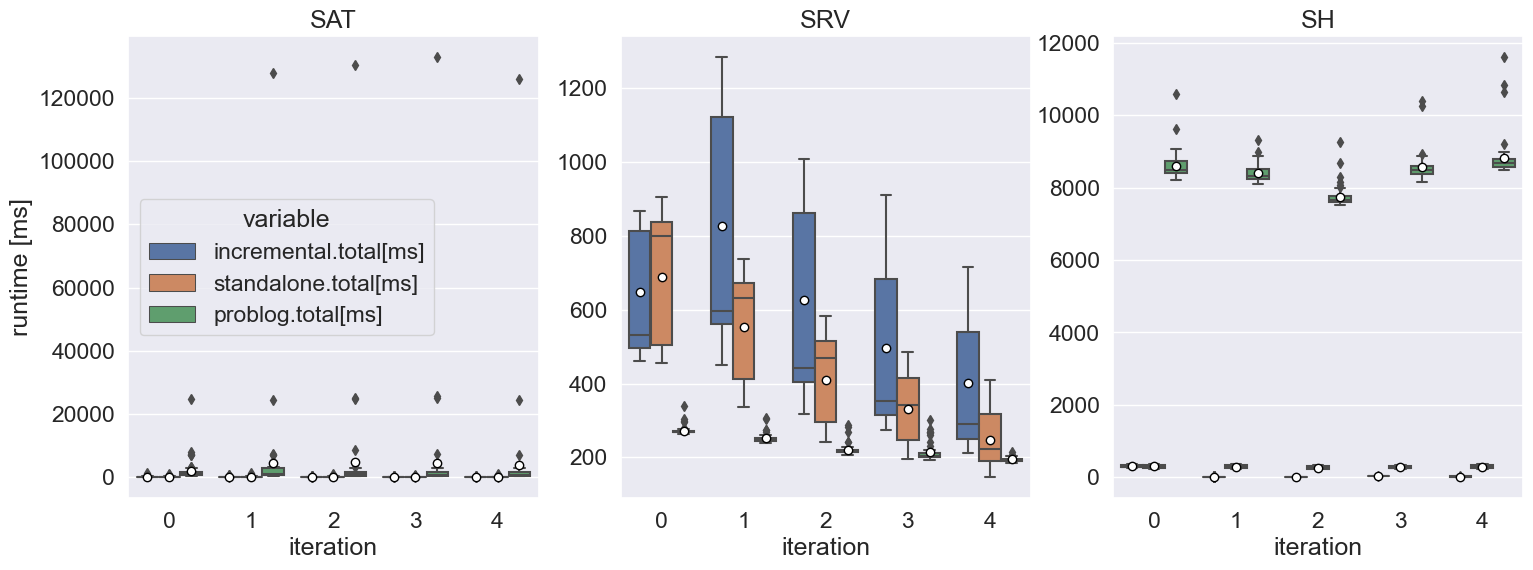

In [3]:
short = pd.melt(df, id_vars=['prefix','run','iteration'],
            value_vars=['incremental.total[ms]','standalone.total[ms]','problog.total[ms]'])
meanprops={'marker':'o',
    'markerfacecolor':'white', 
    'markeredgecolor':'black',
    'markersize':'6'}

fig, axes = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle(None)
fig0 = sns.boxplot(ax=axes[0], data=short[short['prefix']=='SAT'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[0].set(title='SAT', ylabel='runtime [ms]')
#axes[0].get_legend().set_visible(False)
sns.boxplot(ax=axes[1], data=short[short['prefix']=='SRV'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[1].set(title='SRV', ylabel=None)
axes[1].get_legend().set_visible(False)
sns.boxplot(ax=axes[2], data=short[short['prefix']=='SH'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[2].set(title='SH', ylabel=None)
axes[2].get_legend().set_visible(False)
fig.savefig("figures/incremental_detailed.pdf", bbox_inches='tight')

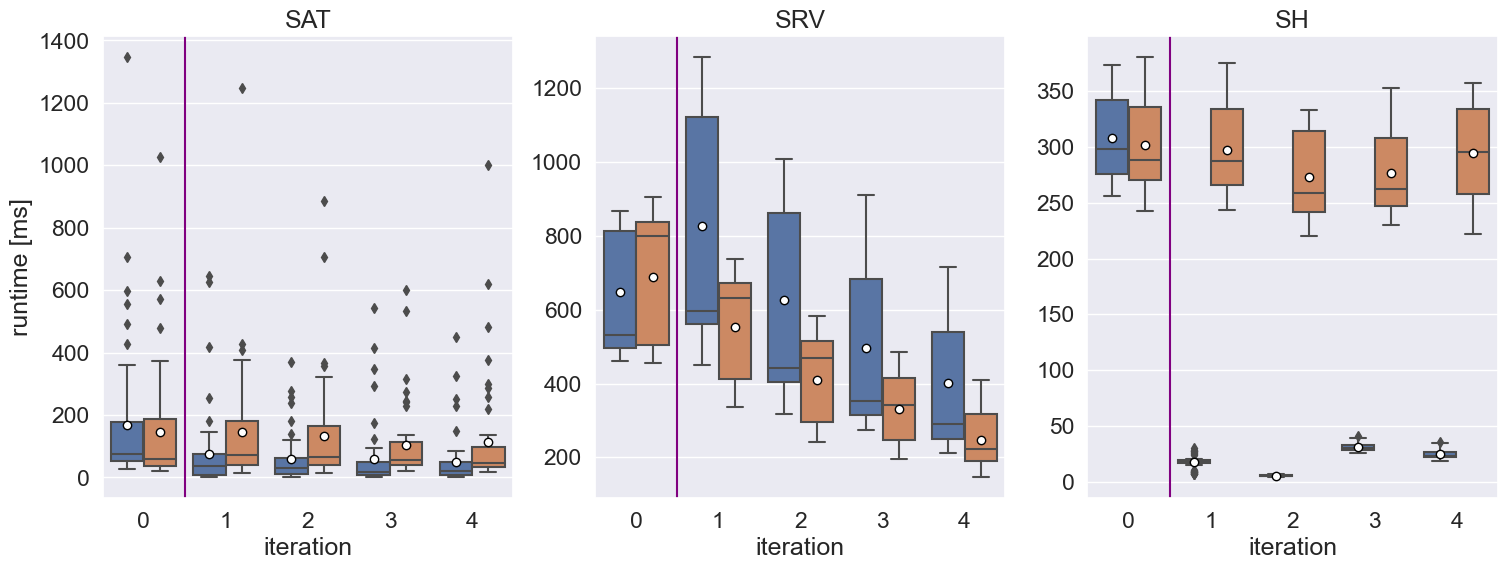

In [4]:
short = pd.melt(df, id_vars=['prefix','run','iteration'],
            value_vars=['incremental.total[ms]','standalone.total[ms]'])
meanprops={'marker':'o',
    'markerfacecolor':'white', 
    'markeredgecolor':'black',
    'markersize':'6'}

fig, axes = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle(None)
fig0 = sns.boxplot(ax=axes[0], data=short[short['prefix']=='SAT'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[0].set(title='SAT', ylabel='runtime [ms]')
axes[0].get_legend().set_visible(False)
axes[0].axvline(0.5,0,1,color='purple')
sns.boxplot(ax=axes[1], data=short[short['prefix']=='SRV'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[1].set(title='SRV', ylabel=None)
axes[1].get_legend().set_visible(False)
axes[1].axvline(0.5,0,1,color='purple')
sns.boxplot(ax=axes[2], data=short[short['prefix']=='SH'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[2].set(title='SH', ylabel=None)
axes[2].get_legend().set_visible(False)
axes[2].axvline(0.5,0,1,color='purple')
fig.savefig("figures/incremental_reduced.pdf", bbox_inches='tight')



In [5]:
satdata = (df[df['prefix']=='SAT']).groupby(['iteration'])['incremental.total[ms]','standalone.total[ms]'].agg(['mean','median'])
srvdata = (df[df['prefix']=='SRV']).groupby(['iteration'])['incremental.total[ms]','standalone.total[ms]'].agg(['mean','median'])
shdata = (df[df['prefix']=='SH']).groupby(['iteration'])['incremental.total[ms]','standalone.total[ms]'].agg(['mean','median'])

pd.set_option('display.precision', 2)

for i in range(0,5):
    satIMean = satdata['incremental.total[ms]']['mean'][i]
    satBMean = satdata['standalone.total[ms]']['mean'][i]
    srvIMean = srvdata['incremental.total[ms]']['mean'][i]
    srvBMean = srvdata['standalone.total[ms]']['mean'][i]
    shIMean = shdata['incremental.total[ms]']['mean'][i]
    shBMean = shdata['standalone.total[ms]']['mean'][i]
    print(f"\t\t{i} & {satIMean:.2f} & {satBMean:.2f} & {srvIMean:.2f} & {srvBMean:.2f} & {shIMean:.2f} & {shBMean:.2f} \\\\ %")
    print('\t\\hline %')


		0 & 167.93 & 145.54 & 648.90 & 689.95 & 308.42 & 301.98 \\ %
	\hline %
		1 & 76.10 & 145.93 & 826.64 & 552.44 & 17.63 & 297.29 \\ %
	\hline %
		2 & 58.79 & 133.68 & 625.10 & 409.05 & 5.58 & 272.75 \\ %
	\hline %
		3 & 57.87 & 102.34 & 495.54 & 330.82 & 30.75 & 276.32 \\ %
	\hline %
		4 & 50.01 & 113.27 & 402.48 & 247.08 & 24.72 & 295.01 \\ %
	\hline %


C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\4168162562.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  satdata = (df[df['prefix']=='SAT']).groupby(['iteration'])['incremental.total[ms]','standalone.total[ms]'].agg(['mean','median'])
C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\4168162562.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  srvdata = (df[df['prefix']=='SRV']).groupby(['iteration'])['incremental.total[ms]','standalone.total[ms]'].agg(['mean','median'])
C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\4168162562.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shdata = (df[df['prefix']=='SH']).groupby(['iteration'])['incremental.total[ms]','standalone.total[ms]'].agg(['mean','median'])


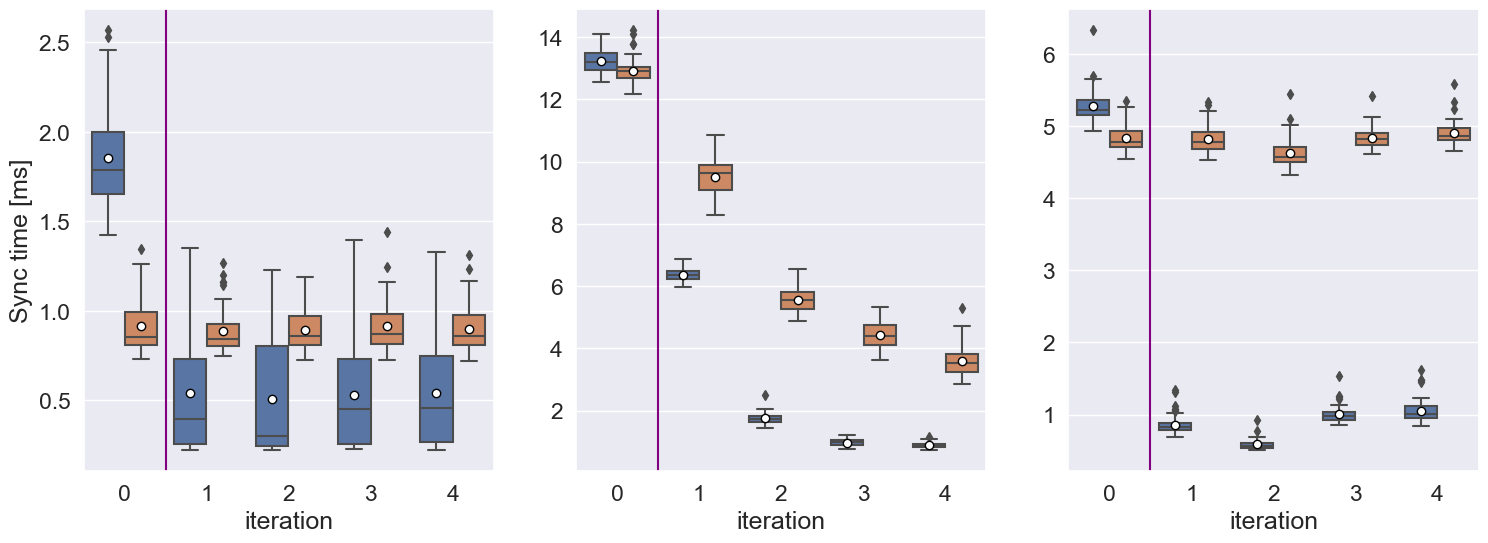

In [6]:
short = pd.melt(df, id_vars=['prefix','run','iteration'],
            value_vars=['incremental.sync[ms]','standalone.sync[ms]'])
meanprops={'marker':'o',
    'markerfacecolor':'white', 
    'markeredgecolor':'black',
    'markersize':'6'}

fig, axes = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle(None)
fig0 = sns.boxplot(ax=axes[0], data=short[short['prefix']=='SAT'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[0].set(title=None, ylabel='Sync time [ms]')
axes[0].get_legend().set_visible(False)
axes[0].axvline(0.5,0,1,color='purple')
sns.boxplot(ax=axes[1], data=short[short['prefix']=='SRV'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[1].set(title=None, ylabel=None)
axes[1].get_legend().set_visible(False)
axes[1].axvline(0.5,0,1,color='purple')
sns.boxplot(ax=axes[2], data=short[short['prefix']=='SH'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[2].set(title=None, ylabel=None)
axes[2].get_legend().set_visible(False)
axes[2].axvline(0.5,0,1,color='purple')
fig.savefig("figures/eval-sync.pdf", bbox_inches='tight')

In [7]:
satdata = (df[df['prefix']=='SAT']).groupby(['iteration'])['incremental.sync[ms]','standalone.sync[ms]'].agg(['mean','median'])
srvdata = (df[df['prefix']=='SRV']).groupby(['iteration'])['incremental.sync[ms]','standalone.sync[ms]'].agg(['mean','median'])
shdata = (df[df['prefix']=='SH']).groupby(['iteration'])['incremental.sync[ms]','standalone.sync[ms]'].agg(['mean','median'])

pd.set_option('display.precision', 2)
print('% Sync times')
for i in range(0,5):
    satIMean = satdata['incremental.sync[ms]']['mean'][i]
    satBMean = satdata['standalone.sync[ms]']['mean'][i]
    srvIMean = srvdata['incremental.sync[ms]']['mean'][i]
    srvBMean = srvdata['standalone.sync[ms]']['mean'][i]
    shIMean = shdata['incremental.sync[ms]']['mean'][i]
    shBMean = shdata['standalone.sync[ms]']['mean'][i]
    print(f"\t\t{i} & {satIMean:.2f} & {satBMean:.2f} & {srvIMean:.2f} & {srvBMean:.2f} & {shIMean:.2f} & {shBMean:.2f} \\\\ %")
    satR = (satIMean/satBMean)-1
    srvR = (srvIMean/srvBMean)-1
    shR = (shIMean/shBMean)-1
    print(f'% \t\tSAT: {satR:.2%}; SRV: {srvR:.2%}; SH: {shR:.2%}')
    print('\t\\hline %')

% Sync times
		0 & 1.85 & 0.91 & 13.23 & 12.91 & 5.29 & 4.84 \\ %
% 		SAT: 102.85%; SRV: 2.47%; SH: 9.27%
	\hline %
		1 & 0.54 & 0.89 & 6.35 & 9.51 & 0.86 & 4.82 \\ %
% 		SAT: -39.30%; SRV: -33.19%; SH: -82.16%
	\hline %
		2 & 0.51 & 0.90 & 1.75 & 5.56 & 0.59 & 4.63 \\ %
% 		SAT: -43.21%; SRV: -68.48%; SH: -87.34%
	\hline %
		3 & 0.53 & 0.91 & 0.97 & 4.42 & 1.00 & 4.83 \\ %
% 		SAT: -42.19%; SRV: -78.00%; SH: -79.28%
	\hline %
		4 & 0.54 & 0.90 & 0.89 & 3.59 & 1.05 & 4.91 \\ %
% 		SAT: -40.19%; SRV: -75.04%; SH: -78.53%
	\hline %


C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\1824453194.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  satdata = (df[df['prefix']=='SAT']).groupby(['iteration'])['incremental.sync[ms]','standalone.sync[ms]'].agg(['mean','median'])
C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\1824453194.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  srvdata = (df[df['prefix']=='SRV']).groupby(['iteration'])['incremental.sync[ms]','standalone.sync[ms]'].agg(['mean','median'])
C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\1824453194.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shdata = (df[df['prefix']=='SH']).groupby(['iteration'])['incremental.sync[ms]','standalone.sync[ms]'].agg(['mean','median'])


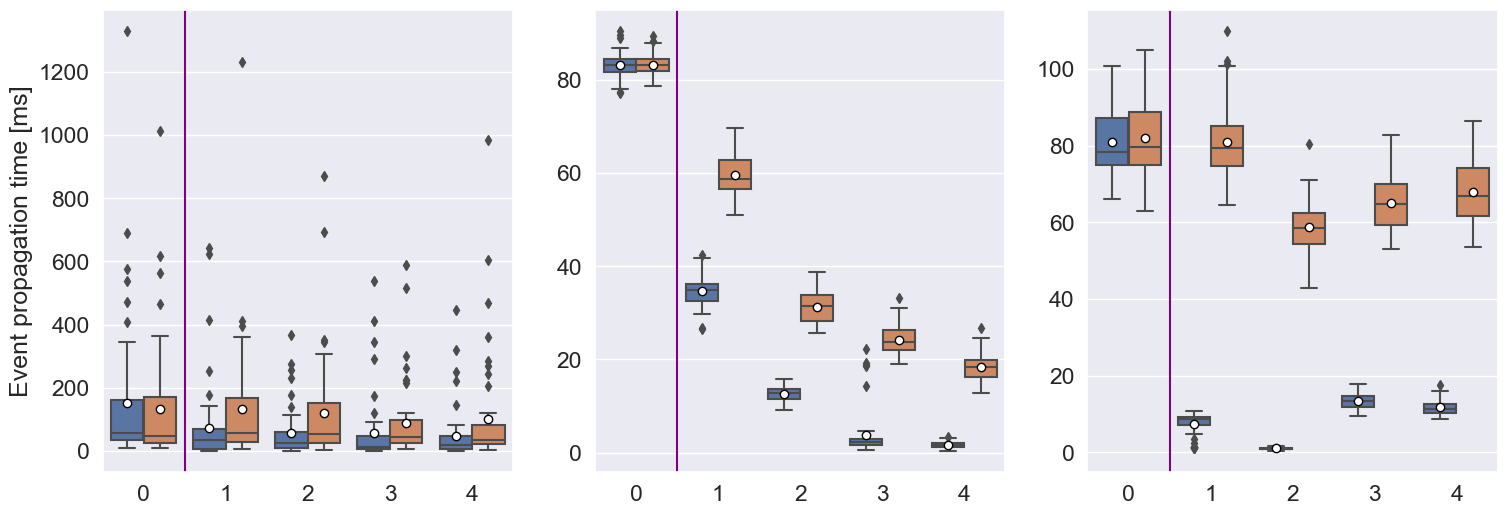

In [8]:
short = pd.melt(df, id_vars=['prefix','run','iteration'],
            value_vars=['incremental.prop[ms]','standalone.prop[ms]'])
meanprops={'marker':'o',
    'markerfacecolor':'white', 
    'markeredgecolor':'black',
    'markersize':'6'}

fig, axes = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle(None)
fig0 = sns.boxplot(ax=axes[0], data=short[short['prefix']=='SAT'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[0].set(title=None, ylabel='Event propagation time [ms]', xlabel=None)
axes[0].get_legend().set_visible(False)
axes[0].axvline(0.5,0,1,color='purple')
sns.boxplot(ax=axes[1], data=short[short['prefix']=='SRV'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[1].set(title=None, ylabel=None, xlabel=None)
axes[1].get_legend().set_visible(False)
axes[1].axvline(0.5,0,1,color='purple')
sns.boxplot(ax=axes[2], data=short[short['prefix']=='SH'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[2].set(title=None, ylabel=None, xlabel=None)
axes[2].get_legend().set_visible(False)
axes[2].axvline(0.5,0,1,color='purple')
fig.savefig("figures/eval-prop.pdf", bbox_inches='tight')

In [9]:
satdata = (df[df['prefix']=='SAT']).groupby(['iteration'])['incremental.prop[ms]','standalone.prop[ms]'].agg(['mean','median'])
srvdata = (df[df['prefix']=='SRV']).groupby(['iteration'])['incremental.prop[ms]','standalone.prop[ms]'].agg(['mean','median'])
shdata = (df[df['prefix']=='SH']).groupby(['iteration'])['incremental.prop[ms]','standalone.prop[ms]'].agg(['mean','median'])

pd.set_option('display.precision', 2)
print('% Event propagation times')
for i in range(0,5):
    satIMean = satdata['incremental.prop[ms]']['mean'][i]
    satBMean = satdata['standalone.prop[ms]']['mean'][i]
    srvIMean = srvdata['incremental.prop[ms]']['mean'][i]
    srvBMean = srvdata['standalone.prop[ms]']['mean'][i]
    shIMean = shdata['incremental.prop[ms]']['mean'][i]
    shBMean = shdata['standalone.prop[ms]']['mean'][i]
    print(f"\t\t{i} & {satIMean:.2f} & {satBMean:.2f} & {srvIMean:.2f} & {srvBMean:.2f} & {shIMean:.2f} & {shBMean:.2f} \\\\ %")
    satR = (satIMean/satBMean)-1
    srvR = (srvIMean/srvBMean)-1
    shR = (shIMean/shBMean)-1
    print(f'% \t\tSAT: {satR:.2%}; SRV: {srvR:.2%}; SH: {shR:.2%}')
    print('\t\\hline %')

% Event propagation times
		0 & 149.99 & 131.51 & 83.30 & 83.36 & 80.85 & 81.88 \\ %
% 		SAT: 14.06%; SRV: -0.06%; SH: -1.26%
	\hline %
		1 & 73.31 & 131.70 & 34.77 & 59.72 & 7.39 & 80.86 \\ %
% 		SAT: -44.33%; SRV: -41.78%; SH: -90.86%
	\hline %
		2 & 55.91 & 119.36 & 12.67 & 31.34 & 1.03 & 58.74 \\ %
% 		SAT: -53.16%; SRV: -59.58%; SH: -98.25%
	\hline %
		3 & 55.27 & 87.71 & 3.77 & 24.25 & 13.47 & 65.05 \\ %
% 		SAT: -36.98%; SRV: -84.45%; SH: -79.29%
	\hline %
		4 & 47.06 & 99.39 & 1.68 & 18.41 & 11.82 & 68.00 \\ %
% 		SAT: -52.65%; SRV: -90.85%; SH: -82.62%
	\hline %


C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\2103329179.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  satdata = (df[df['prefix']=='SAT']).groupby(['iteration'])['incremental.prop[ms]','standalone.prop[ms]'].agg(['mean','median'])
C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\2103329179.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  srvdata = (df[df['prefix']=='SRV']).groupby(['iteration'])['incremental.prop[ms]','standalone.prop[ms]'].agg(['mean','median'])
C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\2103329179.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shdata = (df[df['prefix']=='SH']).groupby(['iteration'])['incremental.prop[ms]','standalone.prop[ms]'].agg(['mean','median'])


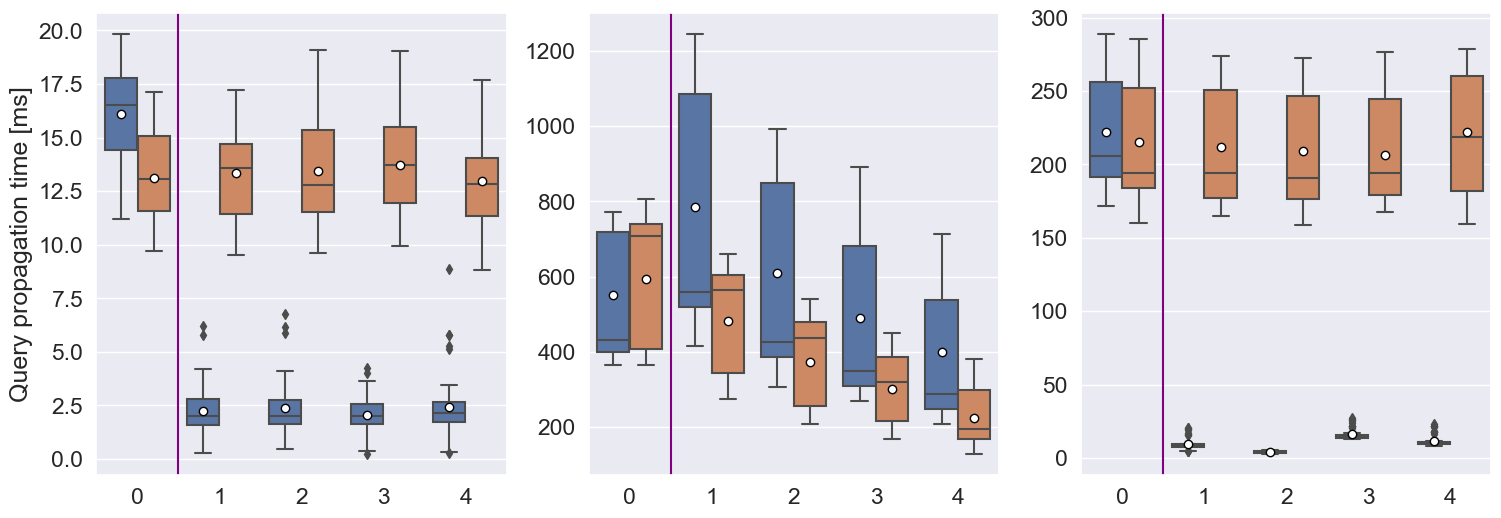

In [10]:

short = pd.melt(df, id_vars=['prefix','run','iteration'],
            value_vars=['incremental.engine[ms]','standalone.engine[ms]'])
meanprops={'marker':'o',
    'markerfacecolor':'white', 
    'markeredgecolor':'black',
    'markersize':'6'}

fig, axes = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle(None)
fig0 = sns.boxplot(ax=axes[0], data=short[short['prefix']=='SAT'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[0].set(title=None, ylabel='Query propagation time [ms]', xlabel=None)
axes[0].get_legend().set_visible(False)
axes[0].axvline(0.5,0,1,color='purple')
sns.boxplot(ax=axes[1], data=short[short['prefix']=='SRV'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[1].set(title=None, ylabel=None, xlabel=None)
axes[1].get_legend().set_visible(False)
axes[1].axvline(0.5,0,1,color='purple')
sns.boxplot(ax=axes[2], data=short[short['prefix']=='SH'], x='iteration', y='value', hue='variable', showmeans=True, meanprops=meanprops)
axes[2].set(title=None, ylabel=None, xlabel=None)
axes[2].get_legend().set_visible(False)
axes[2].axvline(0.5,0,1,color='purple')
fig.savefig("figures/eval-engine.pdf", bbox_inches='tight')

In [11]:
satdata = (df[df['prefix']=='SAT']).groupby(['iteration'])['incremental.engine[ms]','standalone.engine[ms]'].agg(['mean','median'])
srvdata = (df[df['prefix']=='SRV']).groupby(['iteration'])['incremental.engine[ms]','standalone.engine[ms]'].agg(['mean','median'])
shdata = (df[df['prefix']=='SH']).groupby(['iteration'])['incremental.engine[ms]','standalone.engine[ms]'].agg(['mean','median'])

pd.set_option('display.precision', 2)
print('% Query propagation times')
for i in range(0,5):
    satIMean = satdata['incremental.engine[ms]']['mean'][i]
    satBMean = satdata['standalone.engine[ms]']['mean'][i]
    srvIMean = srvdata['incremental.engine[ms]']['mean'][i]
    srvBMean = srvdata['standalone.engine[ms]']['mean'][i]
    shIMean = shdata['incremental.engine[ms]']['mean'][i]
    shBMean = shdata['standalone.engine[ms]']['mean'][i]
    print(f"\t\t{i} & {satIMean:.2f} & {satBMean:.2f} & {srvIMean:.2f} & {srvBMean:.2f} & {shIMean:.2f} & {shBMean:.2f} \\\\ %")
    satR = (satIMean/satBMean)-1
    srvR = (srvIMean/srvBMean)-1
    shR = (shIMean/shBMean)-1
    print(f'% \t\tSAT: {satR:.2%}; SRV: {srvR:.2%}; SH: {shR:.2%}')
    print('\t\\hline %')

% Query propagation times
		0 & 16.09 & 13.12 & 552.36 & 593.68 & 222.28 & 215.26 \\ %
% 		SAT: 22.64%; SRV: -6.96%; SH: 3.26%
	\hline %
		1 & 2.25 & 13.34 & 785.52 & 483.21 & 9.37 & 211.61 \\ %
% 		SAT: -83.14%; SRV: 62.56%; SH: -95.57%
	\hline %
		2 & 2.37 & 13.42 & 610.68 & 372.15 & 3.97 & 209.39 \\ %
% 		SAT: -82.31%; SRV: 64.10%; SH: -98.11%
	\hline %
		3 & 2.07 & 13.72 & 490.80 & 302.15 & 16.28 & 206.44 \\ %
% 		SAT: -84.90%; SRV: 62.43%; SH: -92.12%
	\hline %
		4 & 2.41 & 12.98 & 399.90 & 225.09 & 11.85 & 222.10 \\ %
% 		SAT: -81.45%; SRV: 77.67%; SH: -94.66%
	\hline %


C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\3501113314.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  satdata = (df[df['prefix']=='SAT']).groupby(['iteration'])['incremental.engine[ms]','standalone.engine[ms]'].agg(['mean','median'])
C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\3501113314.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  srvdata = (df[df['prefix']=='SRV']).groupby(['iteration'])['incremental.engine[ms]','standalone.engine[ms]'].agg(['mean','median'])
C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\3501113314.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  shdata = (df[df['prefix']=='SH']).groupby(['iteration'])['incremental.engine[ms]','standalone.engine[ms]'].agg(['mean','median'])


In [12]:
short=df.groupby(['prefix', 'iteration']).aggregate('mean').reset_index()
#short_inc = pd.melt(df, id_vars=['prefix','iteration'],
#            value_vars=['incremental.engine[ms]','incremental.sync[ms]','incremental.prop[ms]'],
#            var_name='inc-var', value_name='inc-val')
#short_sa = pd.melt(df, id_vars=['prefix','iteration'],
#            value_vars=['standalone.engine[ms]','standalone.sync[ms]','standalone.prop[ms]'],
#            var_name='std-var', value_name='std-val')

short_inc = pd.melt(df, id_vars=['prefix','iteration'],
           value_vars=['incremental.engine[ms]','incremental.sync[ms]','incremental.prop[ms]'])
short_inc['type']='inc'
short_sa = pd.melt(df, id_vars=['prefix','iteration'],
            value_vars=['standalone.engine[ms]','standalone.sync[ms]','standalone.prop[ms]'])
short_sa['type']='bat'

short = pd.concat([short_sa,short_inc],ignore_index=True)
short['variable']=short['variable'].map({'incremental.engine[ms]':'engine[ms]',
                 'incremental.sync[ms]':'sync[ms]',
                 'incremental.prop[ms]':'prop[ms]',
                 'standalone.engine[ms]':'engine[ms]',
                 'standalone.sync[ms]':'sync[ms]',
                 'standalone.prop[ms]':'prop[ms]'})
short = short.pivot_table(index=['prefix','iteration','type'], columns='variable')['value'].reset_index()
short['iteration'] = short['iteration'].astype(str)+' '+short['type']

C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\2553123464.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  short=df.groupby(['prefix', 'iteration']).aggregate('mean').reset_index()


C:\Users\matfo50\AppData\Local\Temp\ipykernel_21764\817536416.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['prefix', 'iteration']).median()


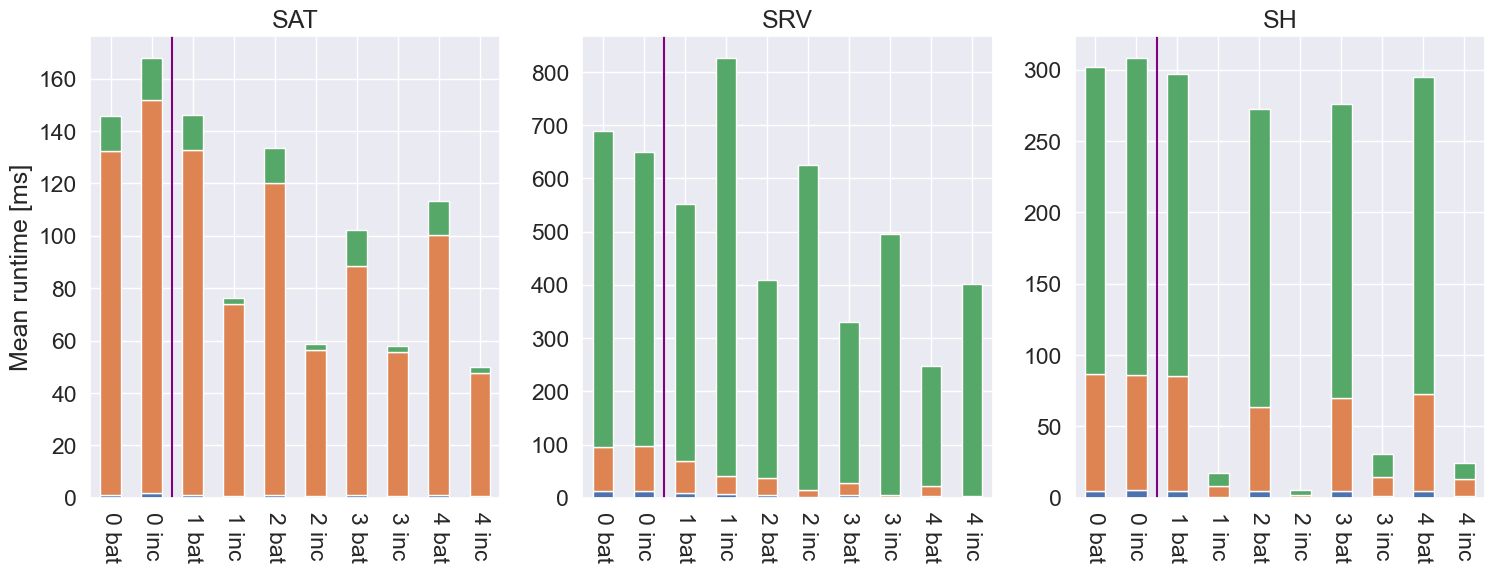

In [13]:

df.groupby(['prefix', 'iteration']).median()

fig, axes = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle('')
#sns.barplot(x='iteration', y='value', hue='variable', data=short[short['prefix']=='SAT'], ax=axes[0])
#plt.bar(data=short,values='value',x='iteration',stack='type')
short[short['prefix']=='SAT'].plot(kind='bar',ax=axes[0], x='iteration',y=['sync[ms]','prop[ms]','engine[ms]'],stacked=True)
axes[0].tick_params(axis='x', labelrotation=-90)
axes[0].set(title='SAT', ylabel='Mean runtime [ms]', xlabel=None)
axes[0].get_legend().set_visible(False)
axes[0].axvline(1.5,0,1,color='purple')
short[short['prefix']=='SRV'].plot(kind='bar',ax=axes[1], x='iteration',y=['sync[ms]','prop[ms]','engine[ms]'],stacked=True)
axes[1].tick_params(axis='x', labelrotation=-90)
axes[1].set(title='SRV', ylabel=None, xlabel=None)
axes[1].get_legend().set_visible(False)
axes[1].axvline(1.5,0,1,color='purple')
short[short['prefix']=='SH'].plot(kind='bar',ax=axes[2], x='iteration',y=['sync[ms]','prop[ms]','engine[ms]'],stacked=True)
axes[2].tick_params(axis='x', labelrotation=-90)
axes[2].set(title='SH', ylabel=None, xlabel=None)
axes[2].get_legend().set_visible(False)
axes[2].axvline(1.5,0,1,color='purple')
fig.savefig("figures/eval-total.pdf", bbox_inches='tight')

In [14]:
print('SAT - inc')
for i in range(0,5):
    satIQ=short[(short['iteration']==f"{i} inc") & (short['prefix']=='SAT')]['engine[ms]'].values[0]
    satIE=short[(short['iteration']==f"{i} inc") & (short['prefix']=='SAT')]['prop[ms]'].values[0]
    satIS=short[(short['iteration']==f"{i} inc") & (short['prefix']=='SAT')]['sync[ms]'].values[0]
    ssum=satIS+satIE+satIQ
    print(f'{i} - Query: {satIQ/ssum:.2%}; Event: {satIE/ssum:.2%}; Synt: {satIS/ssum:.2%}')
print('SAT - batch')
for i in range(0,5):
    satIQ=short[(short['iteration']==f"{i} bat") & (short['prefix']=='SAT')]['engine[ms]'].values[0]
    satIE=short[(short['iteration']==f"{i} bat") & (short['prefix']=='SAT')]['prop[ms]'].values[0]
    satIS=short[(short['iteration']==f"{i} bat") & (short['prefix']=='SAT')]['sync[ms]'].values[0]
    ssum=satIS+satIE+satIQ
    print(f'{i} - Query: {satIQ/ssum:.2%}; Event: {satIE/ssum:.2%}; Synt: {satIS/ssum:.2%}')

print('SRV - inc')
for i in range(0,5):
    satIQ=short[(short['iteration']==f"{i} inc") & (short['prefix']=='SRV')]['engine[ms]'].values[0]
    satIE=short[(short['iteration']==f"{i} inc") & (short['prefix']=='SRV')]['prop[ms]'].values[0]
    satIS=short[(short['iteration']==f"{i} inc") & (short['prefix']=='SRV')]['sync[ms]'].values[0]
    ssum=satIS+satIE+satIQ
    print(f'{i} - Query: {satIQ/ssum:.2%}; Event: {satIE/ssum:.2%}; Synt: {satIS/ssum:.2%}')
print('SRV - batch')
for i in range(0,5):
    satIQ=short[(short['iteration']==f"{i} bat") & (short['prefix']=='SRV')]['engine[ms]'].values[0]
    satIE=short[(short['iteration']==f"{i} bat") & (short['prefix']=='SRV')]['prop[ms]'].values[0]
    satIS=short[(short['iteration']==f"{i} bat") & (short['prefix']=='SRV')]['sync[ms]'].values[0]
    ssum=satIS+satIE+satIQ
    print(f'{i} - Query: {satIQ/ssum:.2%}; Event: {satIE/ssum:.2%}; Synt: {satIS/ssum:.2%}')

print('SH - inc')
for i in range(0,5):
    satIQ=short[(short['iteration']==f"{i} inc") & (short['prefix']=='SH')]['engine[ms]'].values[0]
    satIE=short[(short['iteration']==f"{i} inc") & (short['prefix']=='SH')]['prop[ms]'].values[0]
    satIS=short[(short['iteration']==f"{i} inc") & (short['prefix']=='SH')]['sync[ms]'].values[0]
    ssum=satIS+satIE+satIQ
    print(f'{i} - Query: {satIQ/ssum:.2%}; Event: {satIE/ssum:.2%}; Synt: {satIS/ssum:.2%}')
print('SH - batch')
for i in range(0,5):
    satIQ=short[(short['iteration']==f"{i} bat") & (short['prefix']=='SH')]['engine[ms]'].values[0]
    satIE=short[(short['iteration']==f"{i} bat") & (short['prefix']=='SH')]['prop[ms]'].values[0]
    satIS=short[(short['iteration']==f"{i} bat") & (short['prefix']=='SH')]['sync[ms]'].values[0]
    ssum=satIS+satIE+satIQ
    print(f'{i} - Query: {satIQ/ssum:.2%}; Event: {satIE/ssum:.2%}; Synt: {satIS/ssum:.2%}')


SAT - inc
0 - Query: 9.58%; Event: 89.32%; Synt: 1.10%
1 - Query: 2.96%; Event: 96.34%; Synt: 0.71%
2 - Query: 4.04%; Event: 95.10%; Synt: 0.86%
3 - Query: 3.58%; Event: 95.51%; Synt: 0.91%
4 - Query: 4.81%; Event: 94.11%; Synt: 1.08%
SAT - batch
0 - Query: 9.01%; Event: 90.36%; Synt: 0.63%
1 - Query: 9.14%; Event: 90.25%; Synt: 0.61%
2 - Query: 10.04%; Event: 89.29%; Synt: 0.67%
3 - Query: 13.40%; Event: 85.71%; Synt: 0.89%
4 - Query: 11.46%; Event: 87.75%; Synt: 0.79%
SRV - inc
0 - Query: 85.12%; Event: 12.84%; Synt: 2.04%
1 - Query: 95.03%; Event: 4.21%; Synt: 0.77%
2 - Query: 97.69%; Event: 2.03%; Synt: 0.28%
3 - Query: 99.04%; Event: 0.76%; Synt: 0.20%
4 - Query: 99.36%; Event: 0.42%; Synt: 0.22%
SRV - batch
0 - Query: 86.05%; Event: 12.08%; Synt: 1.87%
1 - Query: 87.47%; Event: 10.81%; Synt: 1.72%
2 - Query: 90.98%; Event: 7.66%; Synt: 1.36%
3 - Query: 91.33%; Event: 7.33%; Synt: 1.34%
4 - Query: 91.10%; Event: 7.45%; Synt: 1.45%
SH - inc
0 - Query: 72.07%; Event: 26.22%; Synt: 1

# Errors

In [15]:
def almostequals(a, b, relerr=1e-10):
    return isclose(a,b,rel_tol=relerr, abs_tol=1e-10)

def compeareJSON(a, b, keyname, valuename):
    a = json.loads(a)
    b = json.loads(b)
    validity = a['valid']==b['valid']
    if(not validity):
        return False
    
    a = a['matches']
    b = b['matches']
    if(not len(a)==len(b)):
        print('Different payload lenght. {a} vs {b}')
        return False
    
    for e in a:
        m = [x for x in b if (x[keyname]==e[keyname]) and almostequals(x[valuename], e[valuename])]
        if(m is None):
            print('{e} is not found in b.')
            return False
    for e in b:
        m = [x for x in a if ((x[keyname]==e[keyname]) and almostequals(x[valuename], e[valuename]))]
        if(m is None):
            print('{e} is not found in a.')
            return False
        
    return True
    

In [16]:
sat = df[df['prefix']=='SAT']

sat_err = pd.DataFrame()
sat_err['inc-std-n'] = (sat['incremental.result']-sat['standalone.result']).abs()/sat['standalone.result']
sat_err['inc-std'] = sat_err.apply(lambda x: almostequals(x['inc-std-n'],0), axis=1)
sat_err['inc-plg-n'] = (sat['incremental.result']-sat['problog.result']).abs()/sat['problog.result']
sat_err['inc-plg'] = sat_err.apply(lambda x: almostequals(x['inc-plg-n'],0), axis=1)
sat_err['std-plg-n'] = (sat['standalone.result']-sat['problog.result']).abs()/sat['problog.result']
sat_err['std-plg'] = sat_err.apply(lambda x: almostequals(x['std-plg-n'],0), axis=1)

#sat_err['inc-plg'] = sat.apply(lambda x: almostequals(abs(x['incremental.result']-x['problog.result'])/x['problog.result'],0), axis=1)
#sat_err['std-plg'] = sat.apply(lambda x: almostequals(abs(x['standalone.result']-x['problog.result'])/x['problog.result'],0), axis=1)



print("Number of excessive deviations in SAT: {errs}".format(errs=(
    sat_err['inc-std'].value_counts().get(False,0) + 
    sat_err['inc-plg'].value_counts().get(False,0) + 
    sat_err['std-plg'].value_counts().get(False,0))))

Number of excessive deviations in SAT: 0


In [17]:
srv = df[df['prefix']=='SRV']

srv_err = pd.DataFrame()
srv_err['inc-std'] = srv.apply(lambda x: compeareJSON(x['incremental.result'], x['standalone.result'],'object', 'probability'), axis=1)
srv_err['inc-plg'] = srv.apply(lambda x: compeareJSON(x['incremental.result'], x['problog.result'],'object', 'probability'), axis=1)
srv_err['std-plg'] = srv.apply(lambda x: compeareJSON(x['standalone.result'], x['problog.result'],'object', 'probability'), axis=1)

print("Number of excessive deviations in SRV: {errs}".format(errs=(
    srv_err['inc-std'].value_counts().get(False,0) + 
    srv_err['inc-plg'].value_counts().get(False,0) + 
    srv_err['std-plg'].value_counts().get(False,0))))

Different payload lenght. {a} vs {b}
Different payload lenght. {a} vs {b}
Different payload lenght. {a} vs {b}
Different payload lenght. {a} vs {b}
Number of excessive deviations in SRV: 4


In [18]:
sh = df[df['prefix']=='SH']

sh_err = pd.DataFrame()
sh_err['inc-std'] = sh.apply(lambda x: compeareJSON(x['incremental.result'], x['standalone.result'],'measurement', 'probability'), axis=1)
sh_err['inc-plg'] = sh.apply(lambda x: compeareJSON(x['incremental.result'], x['problog.result'],'measurement', 'probability'), axis=1)
sh_err['std-plg'] = sh.apply(lambda x: compeareJSON(x['standalone.result'], x['problog.result'],'measurement', 'probability'), axis=1)

print("Number of excessive deviations in SH: {errs}".format(errs=(
    sh_err['inc-std'].value_counts().get(False,0) + 
    sh_err['inc-plg'].value_counts().get(False,0) + 
    sh_err['std-plg'].value_counts().get(False,0))))

Number of excessive deviations in SH: 0


In [19]:
df = pd.concat([
    pd.read_csv('logs-scale/log-SAT-20-run.txt'),
    pd.read_csv('logs-scale/log-SAT-40-run.txt'),
    pd.read_csv('logs-scale/log-SAT-60-run.txt'),
    pd.read_csv('logs-scale/log-SAT-80-run.txt'),
    pd.read_csv('logs-scale/log-SRV-10-run.txt'),
    pd.read_csv('logs-scale/log-SRV-100-run.txt'),
    pd.read_csv('logs-scale/log-SRV-1000-run.txt'),
    pd.read_csv('logs-scale/log-SRV-10000-run.txt'),
    pd.read_csv('logs-scale/log-SH-100-run.txt'),
    pd.read_csv('logs-scale/log-SH-200-run.txt'),
    pd.read_csv('logs-scale/log-SH-300-run.txt'),
    pd.read_csv('logs-scale/log-SH-400-run.txt')
    ],ignore_index=True)
df['incremental.engine[ms]']=df['incremental.total[ms]']-(df['incremental.sync[ms]']+df["incremental.prop[ms]"])